In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Reviews.csv')
UsefulFeatures=['Score','Text']
df=df[UsefulFeatures]
df.to_csv('ModifiedReviews.csv',index=False)

df=pd.read_csv('ModifiedReviews.csv')
df

,Score,Text
0,1,I thought I will get some flavorings to delica...
1,1,I wouldn't know how this product tastes as non...
2,1,This stuff is just cheap powder green tea noth...
3,1,"As others have also mentioned, my cat got stru..."
4,1,I have 3 dogs and all three of my dogs will no...
...,...,...
189497,5,"My sister bought me the small one, of 30g. I w..."
189498,5,This is our source for a lovely tea which we c...
189499,5,My dog will stare at me until she gets one of ...
189500,5,My dogs have always been on a high quality die...


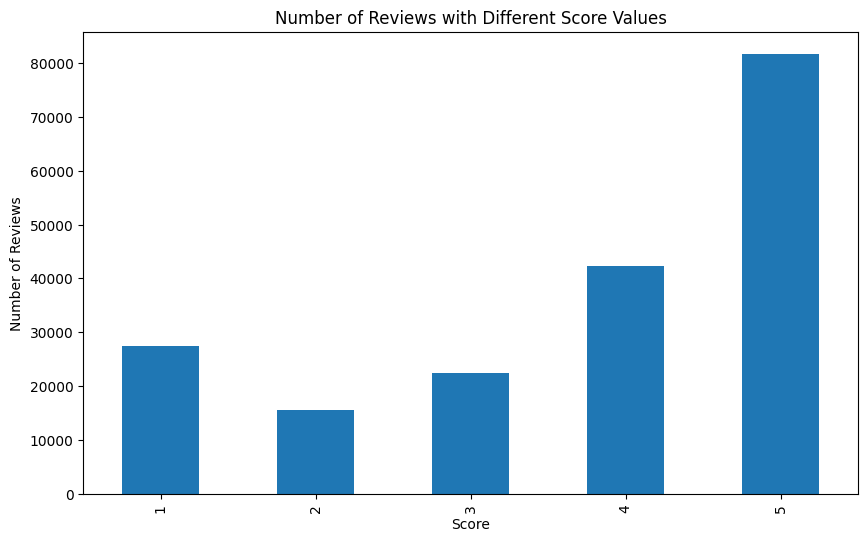

In [2]:
#Lets check what are the different score values present in the dataset
score_counts = df['Score'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews with Different Score Values')
plt.show()

#We can see that most of the reviews have 5 stars at a very high rate and others are comparatively very low
#This can cause overfitting to predict 5 stars when used to produce output. So, lets clear a large no of 5 star reviews


Score
5    49022
4    42344
1    27441
3    22386
2    15628
Name: count, dtype: int64


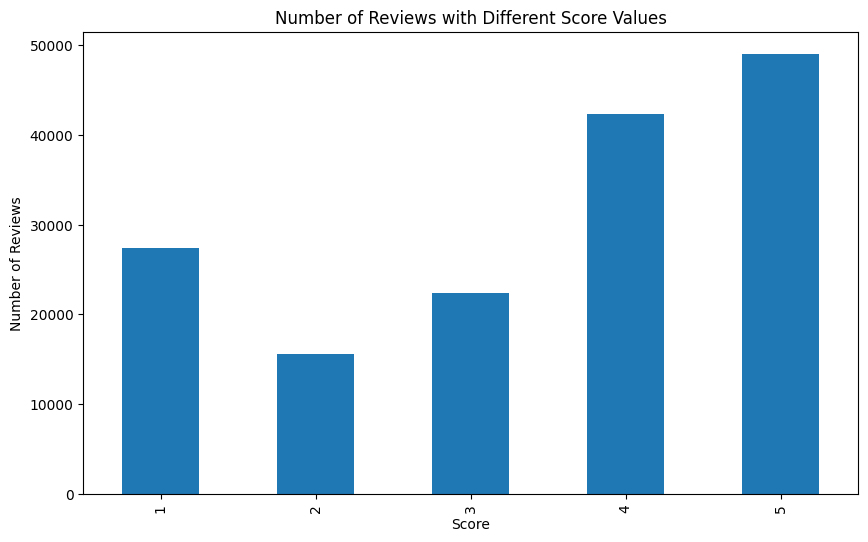

In [3]:
five_star_reviews = df[df['Score'] == 5]

# Randomly sample 40% of the 5-star reviews
sampled_five_star_reviews = five_star_reviews.sample(frac=0.6, random_state=1)


non_five_star_reviews = df[df['Score'] != 5]

# Combine the sampled 5-star reviews with the rest of the reviews
trimmed_df = pd.concat([non_five_star_reviews, sampled_five_star_reviews])

# Verify the result
print(trimmed_df['Score'].value_counts())



#Lets check the same plot for this new dataframe
score_counts = trimmed_df['Score'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews with Different Score Values')
plt.show()

#This wraps up our data preparation part as the data is complete with no missing values and is ready to be used for training the model


In [4]:
#Lets save this dataframe to the csv file
trimmed_df.to_csv('ModifiedReviews.csv', index=False)

In [5]:
#Apparently Even this dirtors the data a lot towards 5 rating
#So, now we will utilize similar no of samples of each rating to make the data more balanced
#We will make each rating have 10000 samples
sampled_one_star_reviews = df[df['Score'] == 1].sample(n=10000, random_state=1)
sampled_two_star_reviews = df[df['Score'] == 2].sample(n=10000, random_state=1)
sampled_three_star_reviews = df[df['Score'] == 3].sample(n=10000, random_state=1)
sampled_four_star_reviews = df[df['Score'] == 4].sample(n=10000, random_state=1)
sampled_five_star_reviews = df[df['Score'] == 5].sample(n=10000, random_state=1)

# Combine the sampled reviews
BalancedDf=pd.concat([sampled_one_star_reviews, sampled_two_star_reviews, sampled_three_star_reviews, sampled_four_star_reviews, sampled_five_star_reviews])
print(len(BalancedDf))
BalancedDf.to_csv('ModifiedReviews.csv', index=False)


50000


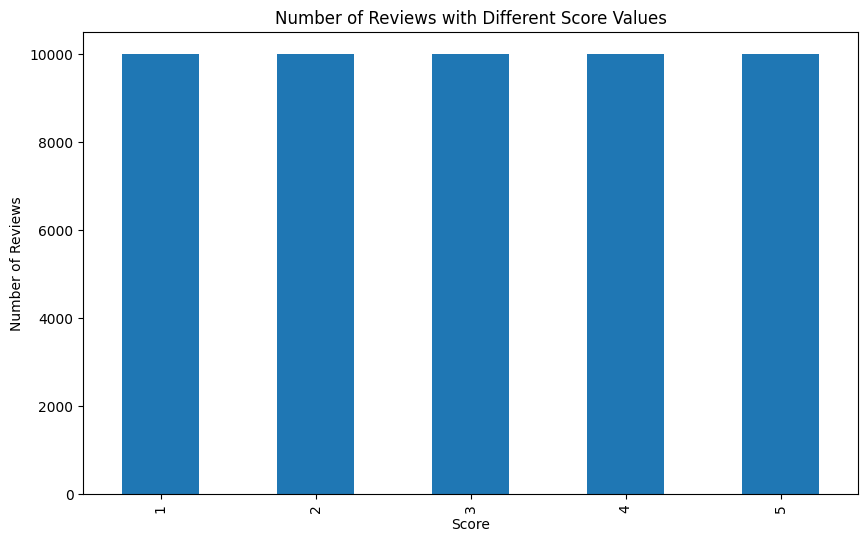

In [6]:
df=pd.read_csv('ModifiedReviews.csv')
score_counts = df['Score'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews with Different Score Values')
plt.show()